<a href="https://colab.research.google.com/github/polock11/TensorFlow/blob/main/02_neural_net_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating data and visualize

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
df = pd.DataFrame({'XO': X[:,0],
                  'X1': X[:,1],
                   'label':y})

In [ ]:
df.head(4)

,XO,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1


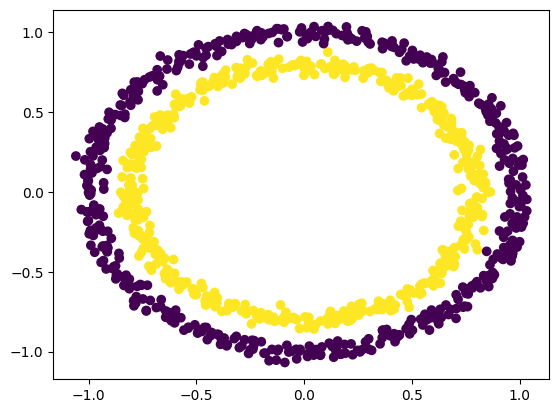

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# Input and output shape

In [ ]:
tf.random.set_seed(42)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1),
)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 2.9087 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7688 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4880


# Increase layers and train for more epochs

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.1376 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7271 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7168 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5020
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4880
Epoch 11/

# Imporving Model

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 2.8694 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.5200
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4870
Epoch 11/

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090


[0.697314977645874, 0.5090000033378601]

# to visualize the predictions plotting a decision boundry

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


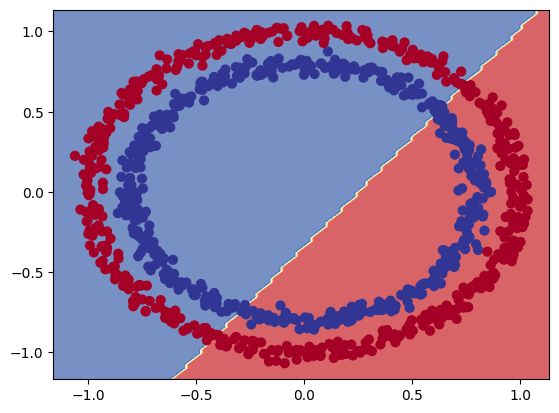

In [ ]:
plot_decision_boundary(model_3, X, y)

9600/9600 [==============================] - 16s 2ms/step


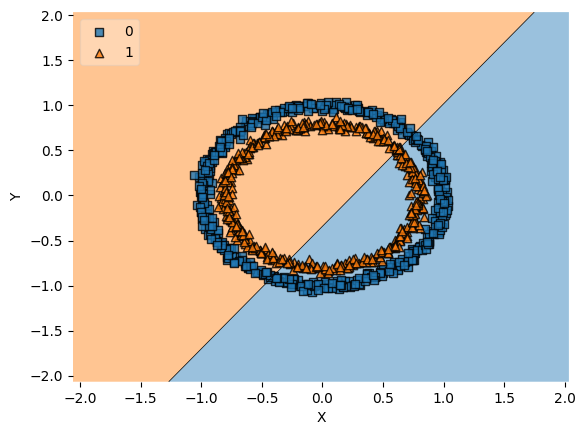

In [ ]:
from mlxtend.plotting import plot_decision_regions

# doc: https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

plot_decision_regions(X, y, clf=model_3, legend=2)

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
    )

model_6.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 2s 4ms/step - loss: 0.7001 - accuracy: 0.5050
Epoch 2/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4740
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4770
Epoch 4/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 5/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4820
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 8/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 9/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5040
Epoch 10/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931471228599548, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


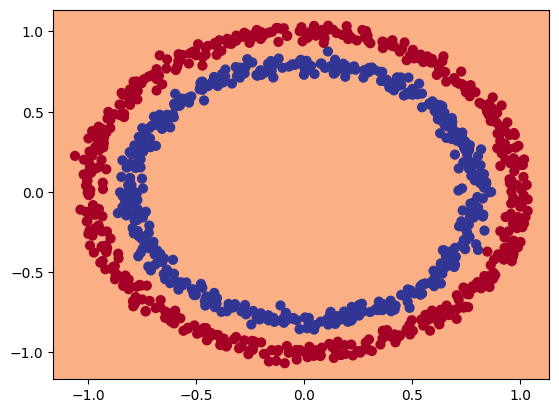

In [ ]:
plot_decision_boundary(model_6, X, y)

9600/9600 [==============================] - 17s 2ms/step


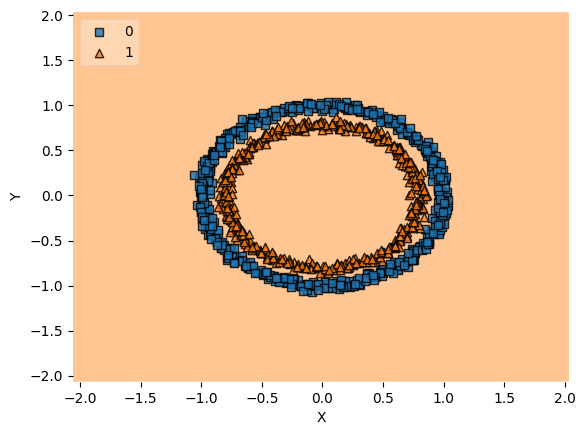

In [ ]:
from mlxtend.plotting import plot_decision_regions

# doc: https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

plot_decision_regions(X, y, clf=model_6, legend=2)

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Linear and Non-Linear Functions

In [ ]:
a = tf.cast(tf.range(-10,10,1), dtype=tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

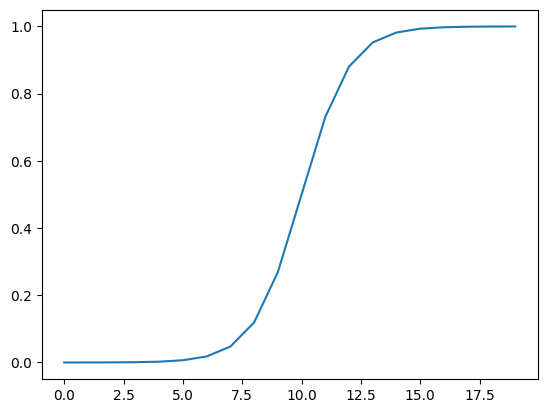

In [ ]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

plt.plot(sigmoid(a))

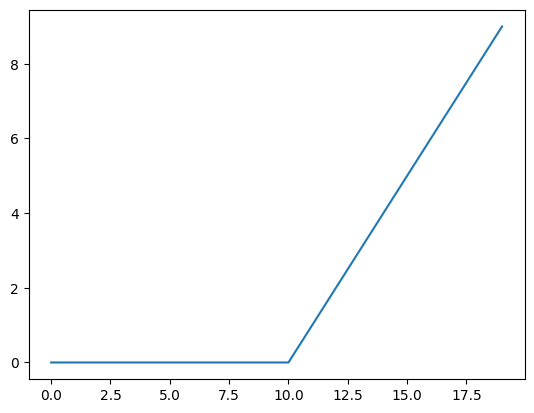

In [ ]:
def relu(x):
    return tf.maximum(0,x)

plt.plot(relu(a))

# Training with Test and Train data

In [ ]:
n_samples = 2000

X, y = make_circles(n_samples, noise=0.05, random_state=23)

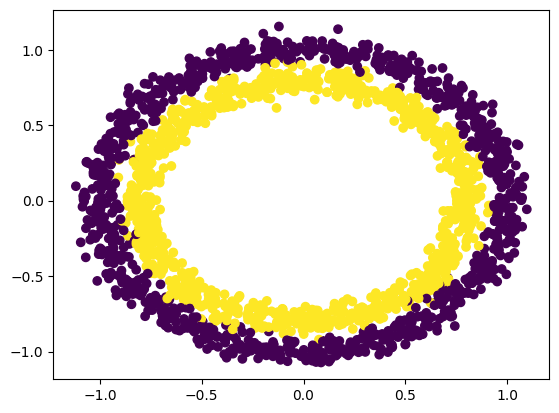

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X_train = X[:1500]
y_train = y[:1500]

X_test = X[1500:]
y_test = y[1500:]

In [ ]:
tf.random.set_seed(69)

In [ ]:
model_7 = tf.keras.Sequential([
    #tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_7 = model_7.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
47/47 [==============================] - 2s 4ms/step - loss: 0.6798 - accuracy: 0.5687
Epoch 2/30
47/47 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.6747
Epoch 3/30
47/47 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.8273
Epoch 4/30
47/47 [==============================] - 0s 3ms/step - loss: 0.3437 - accuracy: 0.9133
Epoch 5/30
47/47 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9487
Epoch 6/30
47/47 [==============================] - 0s 4ms/step - loss: 0.1715 - accuracy: 0.9580
Epoch 7/30
47/47 [==============================] - 0s 4ms/step - loss: 0.1364 - accuracy: 0.9653
Epoch 8/30
47/47 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9587
Epoch 9/30
47/47 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9580
Epoch 10/30
47/47 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9493
Epoch 11/30
47/47 [

Text(0.5, 1.0, 'Model_7 training curves')

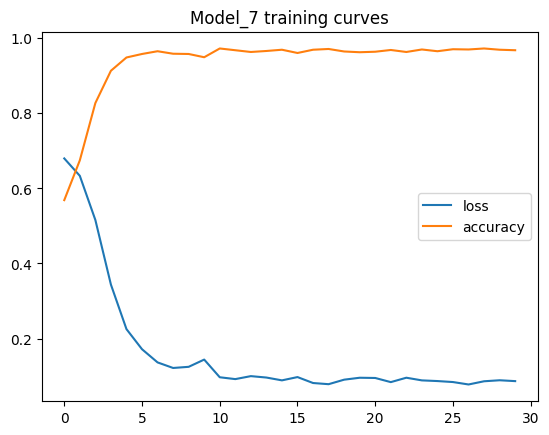

In [ ]:
#loss curve

pd.DataFrame(history_7.history).plot()
plt.title("Model_7 training curves")

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

16/16 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9820
Model loss on the test set: 0.0596998892724514
Model accuracy on the test set: 98.20%


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


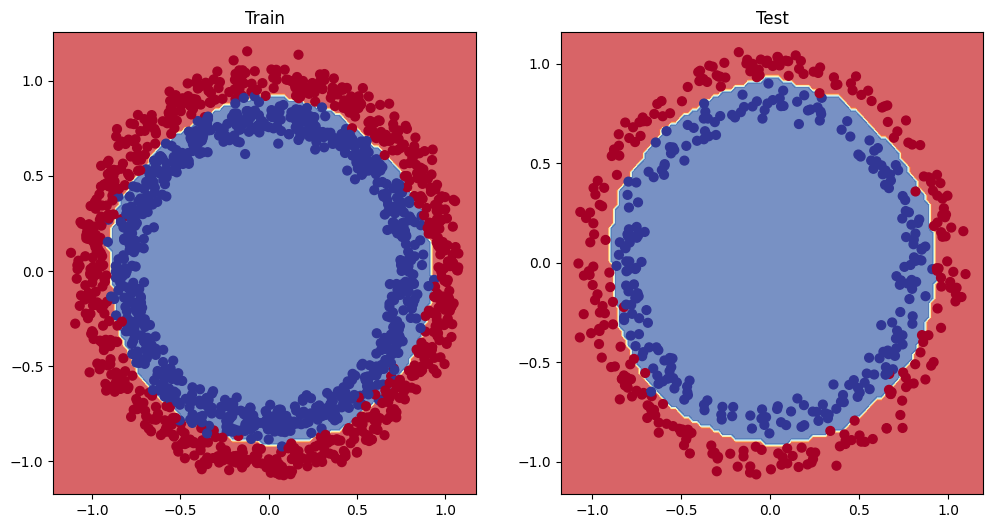

In [ ]:
# plotting decision boundary for train and test data

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

# Finding the best learning rate

* use learning rate callbacks

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_8 =tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_8 = model_8.fit(X_train, y_train, callbacks = [lr_scheduler], epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5060 - lr: 1.0000e-04
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5047 - lr: 1.1220e-04
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5060 - lr: 1.2589e-04
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5067 - lr: 1.4125e-04
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5067 - lr: 1.5849e-04
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5067 - lr: 1.7783e-04
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5093 - lr: 1.9953e-04
Epoch 8/100
47/47 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5087 - lr: 2.2387e-04
Epoch 9/100
47/47 [==============================] - 0s 5ms/step - loss:

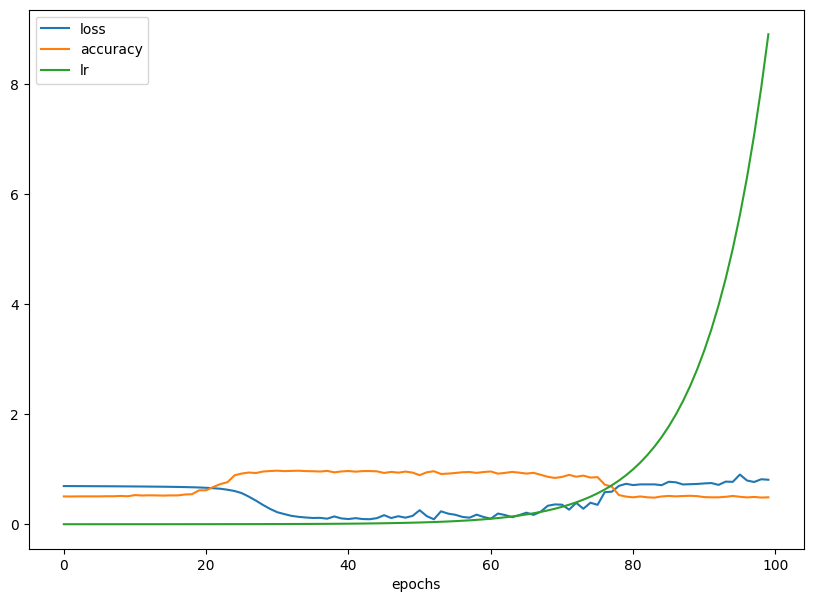

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs");

In [ ]:
pd.DataFrame(history_8.history)

,loss,accuracy,lr
0,0.694198,0.506000,0.000100
1,0.693686,0.504667,0.000112
2,0.693149,0.506000,0.000126
3,0.692563,0.506667,0.000141
4,0.691914,0.506667,0.000158
...,...,...,...
95,0.903587,0.498667,5.623413
96,0.795090,0.488000,6.309574
97,0.768114,0.496000,7.079458
98,0.818287,0.485333,7.943282


Text(0, 0.5, 'Loss')

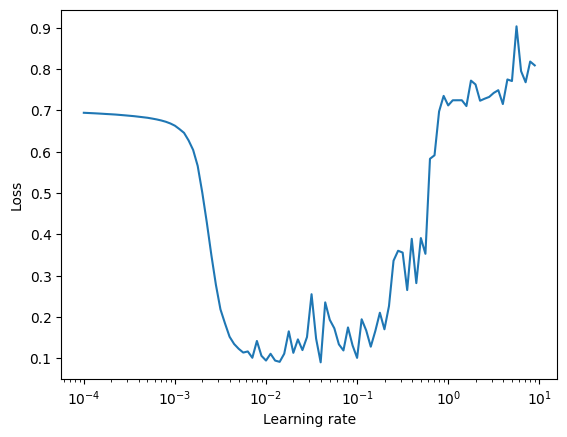

In [ ]:
# Plot lr vs loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [ ]:
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

16/16 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9820
Model loss on the test set: 0.0596998892724514
Model accuracy on the test set: 98.20%


In [ ]:
from sklearn.metrics import precision_score
precision  = precision_score(y_test, tf.round(model_7.predict(X_test)))
precision

16/16 [==============================] - 0s 2ms/step


0.9676113360323887

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, tf.round(model_7.predict(X_test)))

16/16 [==============================] - 0s 3ms/step


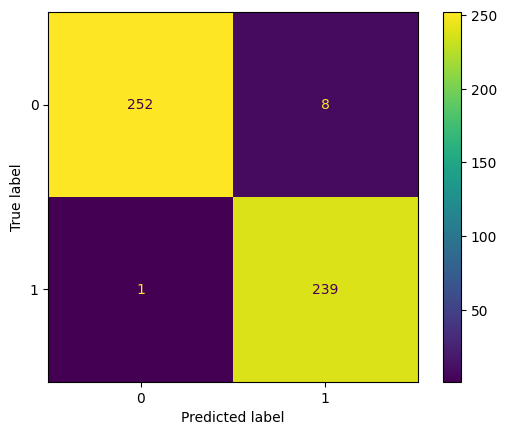

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

# Working With Larger Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.random.set_seed(42)

In [3]:
#load dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# label int to label name

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


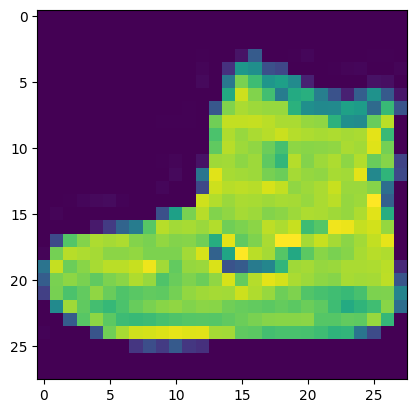

In [5]:
plt.imshow(train_data[0])

In [6]:
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])


#if labels in int form (tensors, vectors) use SpareseCategoricalCrossentropy(), and if in onehot form use CategoricalCrossentropy

model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_11 = model_11.fit(
    train_data,
    train_labels,
    epochs = 10,
    validation_data = (test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3335 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy:

In [ ]:
model_11.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5238 - accuracy: 0.3266


[1.5237871408462524, 0.32659998536109924]

In [ ]:
train_data.min(), train_data.max()

(0, 255)

# Training with normalize data
    * feature value is from (0 to 1)

In [7]:
tf.random.set_seed(42)

In [8]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [9]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [10]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
], name = 'model_12_norm')


#if labels in int form (tensors, vectors) use SpareseCategoricalCrossentropy(), and if in onehot form use CategoricalCrossentropy

model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr = .01),
    metrics=['accuracy']
)

history_12 = model_12.fit(
    train_data_norm,
    train_labels,
    epochs = 10,
    validation_data = (test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4739 - accuracy: 0.4572 - val_loss: 1.1138 - val_accuracy: 0.6222
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9368 - accuracy: 0.6724 - val_loss: 0.8566 - val_accuracy: 0.6885
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7509 - accuracy: 0.7340 - val_loss: 0.7455 - val_accuracy: 0.7406
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6713 - accuracy: 0.7583 - val_loss: 0.6888 - val_accuracy: 0.7547
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6407 - accuracy: 0.7675 - val_loss: 0.6627 - val_accuracy: 0.7671
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6270 - accuracy: 0.7725 - val_loss: 0.6834 - val_accuracy: 0.7583
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6174 - accuracy: 0.7764 - val_loss: 0.6546 - val_accuracy:

In [11]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6330 - accuracy: 0.7740


[0.6330102682113647, 0.7739999890327454]

In [ ]:

train_data_flat = train_data.reshape((train_data.shape[0], 28 * 28))
test_data_flat = test_data.reshape((test_data.shape[0], 28 * 28))

train_data_flat_norm = train_data_flat/255.0
test_data_flat_norm = test_data_flat/255.0

# Loss curves

<Axes: title={'center': 'Normalized data loss curve'}>

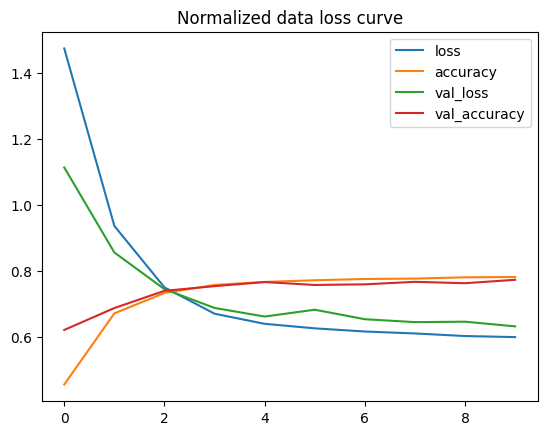

In [12]:
import pandas as pd

#pd.DataFrame(history_11.history).plot(title="Non normal loss curve")

pd.DataFrame(history_12.history).plot(title='Normalized data loss curve')

# Finding the correct learning rate

In [13]:
tf.random.set_seed(42)


model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
], name = 'model_13')


#if labels in int form (tensors, vectors) use SpareseCategoricalCrossentropy(), and if in onehot form use CategoricalCrossentropy

model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


history_13 = model_13.fit(
    train_data_norm,
    train_labels,
    epochs = 40,
    validation_data = (test_data_norm, test_labels),
    callbacks = [lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1899 - accuracy: 0.5800 - val_loss: 0.8388 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7455 - accuracy: 0.7511 - val_loss: 0.6988 - val_accuracy: 0.7672 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6511 - accuracy: 0.7742 - val_loss: 0.6561 - val_accuracy: 0.7701 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6155 - accuracy: 0.7835 - val_loss: 0.6390 - val_accuracy: 0.7761 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6030 - accuracy: 0.7888 - val_loss: 0.6316 - val_accuracy: 0.7858 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5832 - accuracy: 0.8016 - val_loss: 0.6387 - val_accuracy: 0.7797 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

<Axes: >

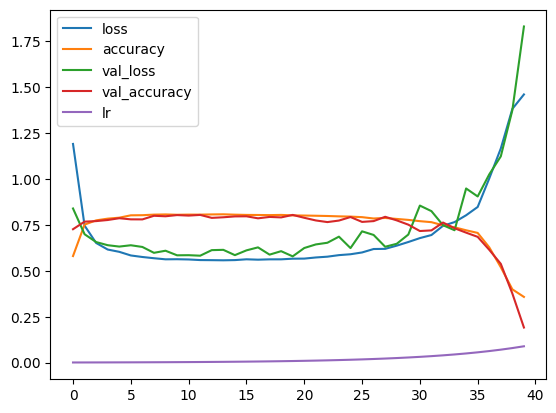

In [14]:
pd.DataFrame(history_13.history).plot()

Text(0, 0.5, 'Loss')

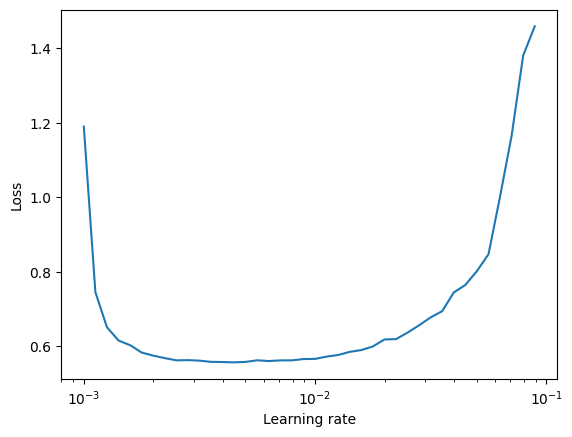

In [15]:
lrs = 1e-3 * (10 **(tf.range(40)/20))
plt.semilogx(lrs, history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel('Loss')

In [ ]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8065 - accuracy: 0.7040


[0.8065378069877625, 0.7039999961853027]

#### Model with the best learning rate

In [83]:
tf.random.set_seed(42)


model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(40, activation = "relu"),
    tf.keras.layers.Dense(35, activation = "relu"),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
], name = 'model_14')


#if labels in int form (tensors, vectors) use SpareseCategoricalCrossentropy(), and if in onehot form use CategoricalCrossentropy

model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


history_14 = model_14.fit(
    train_data_norm,
    train_labels,
    epochs = 25,
    validation_data = (test_data_norm, test_labels)
    #callbacks = [lr_scheduler]
)

Epoch 1/25
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6035 - accuracy: 0.7923 - val_loss: 0.4662 - val_accuracy: 0.8363
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4129 - accuracy: 0.8518 - val_loss: 0.4781 - val_accuracy: 0.8380
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3735 - accuracy: 0.8653 - val_loss: 0.4139 - val_accuracy: 0.8475
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3505 - accuracy: 0.8751 - val_loss: 0.4152 - val_accuracy: 0.8508
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3353 - accuracy: 0.8768 - val_loss: 0.3966 - val_accuracy: 0.8586
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3193 - accuracy: 0.8832 - val_loss: 0.3906 - val_accuracy: 0.8587
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3101 - accuracy: 0.8868 - val_loss: 0.3944 - val_accuracy

<Axes: >

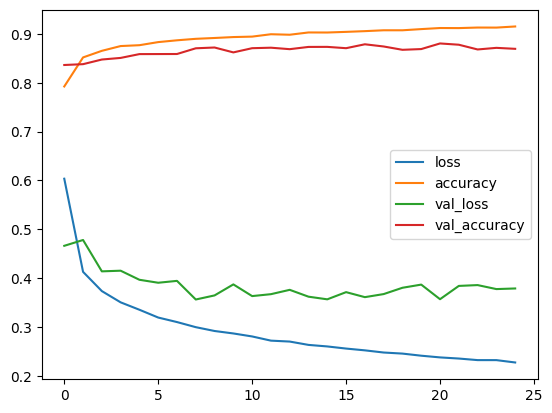

In [84]:
pd.DataFrame(history_14.history).plot()

# Making Predictions


In [85]:
preds = model_14.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


In [86]:
y_pred = [pred.argmax() for pred in preds]

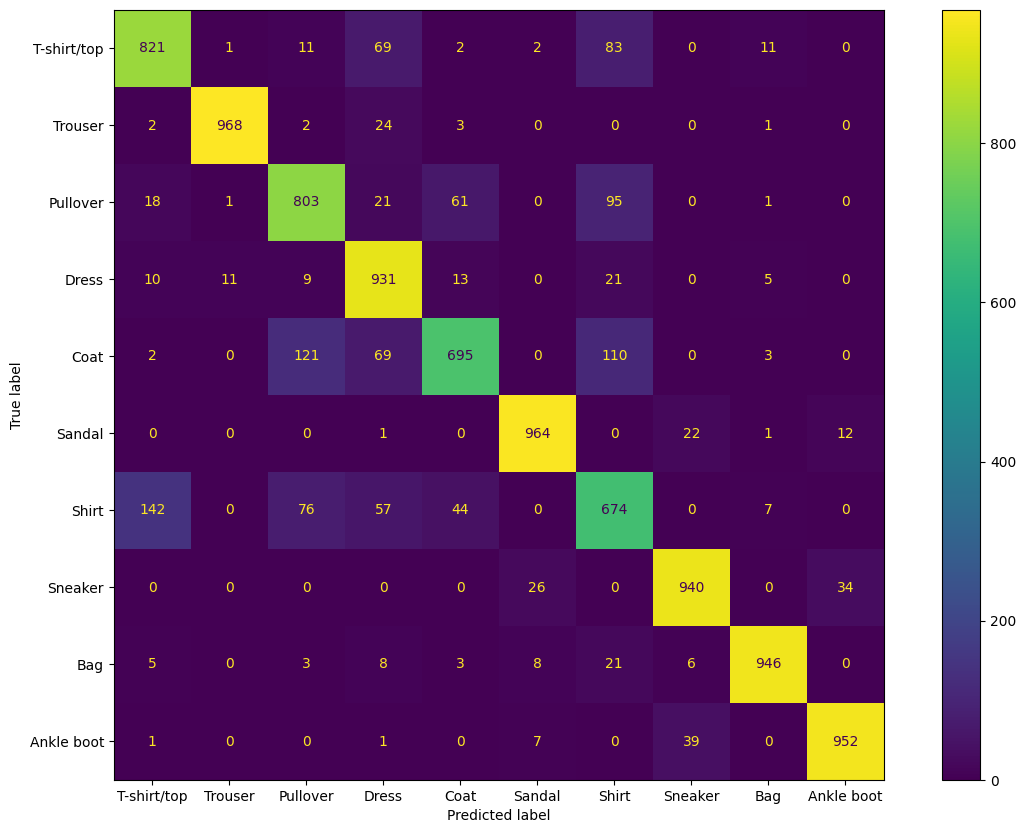

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

fig, ax = plt.subplots(figsize=(15, 10))
disp.plot(ax=ax)

plt.show()

In [103]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks 15 random images, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  #i = random.randint(0, len(images))
  random_idx =[ random.randint(0, len(images)) for i in range(0,15)]

  # Create predictions and targets
  plt.figure(figsize=(20, 10))
  for i in range(0,len(random_idx)):
    plt.subplot(3,5,i+1)
    target_image = images[random_idx[i]]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[random_idx[i]]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                color=color) # set the color to green or red

1/1 [==============================] - 0s 18ms/step


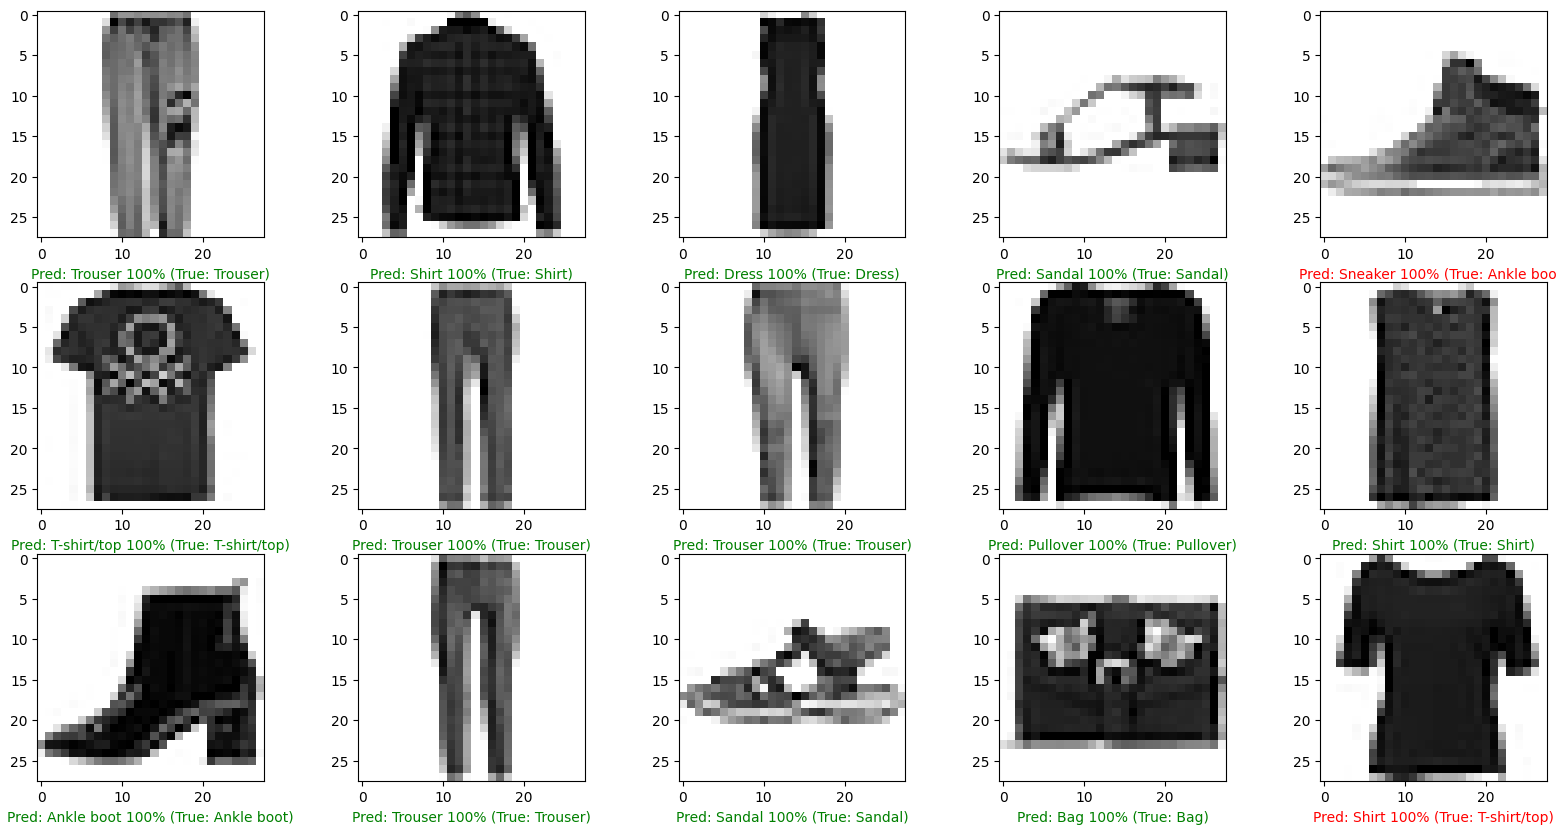

In [105]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)